<a href="https://colab.research.google.com/github/bhavya26082004/python/blob/main/AD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import random
import string
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('popular', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [ ]:
f=open('/content/1.txt','r',errors = 'ignore')
raw = f.read()
raw = raw.lower()

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import nltk
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

In [ ]:
import nltk
import string

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
GREETING_INPUTS=("hello","hi","greetings","sup","what's up","hey")
GREETING_RESPONSES=["hi","hey","nods","hi there","hello","I am glad! You are talking to me","I am fine! How about you?"]
def greeting(sentence):
  for word in sentence.split():
    if word.lower() in GREETING_INPUTS:
      return random.choice(GREETING_RESPONSES)

In [ ]:
def response(user_response):
  robo_response=''
  sent_tokens.append(user_response)
  TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
  tfidf = TfidfVec.fit_transform(sent_tokens)
  vals = cosine_similarity(tfidf[-1], tfidf)
  idx=vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]
  if(req_tfidf==0):
    robo_response=robo_response+"I am sorry! I don't understand you."
    return robo_response
  else:
    robo_response = robo_response+sent_tokens[idx]
    return robo_response

In [ ]:
flag=True
print("SaBot: My name is SABot. How can I assist you?. \
If you wand to exit, type Bye!")
while(flag==True):
  user_response = input()
  user_response=user_response.lower()
  if(user_response!='bye'):
    if(user_response=='thanks' or user_response=='thank you' ):
      flag=False
      print("SaBot: You are welcome..")
    else:
      if(greeting(user_response)!=None):
        print("SaBot: "+greeting(user_response))
      else:
        print("SaBot: ",end="")
        print(response(user_response))
        sent_tokens.remove(user_response)
  else:
    flag=False
    print("SaBot: Bye! take care..")

SaBot: My name is SABot. How can I assist you?. If you wand to exit, type Bye!
hi
SaBot: hi there
how are you
SaBot: I am sorry! I don't understand you.

SaBot: I am sorry! I don't understand you.
thanks
SaBot: You are welcome..


In [19]:
sent = "Ram is studing at Malla Reddy University in Hyderabad, India"

In [20]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [21]:
#!pip install svglib

In [22]:
!pip install svgling

In [25]:
import svgling
svgling.draw_tree(sent)

In [29]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [32]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

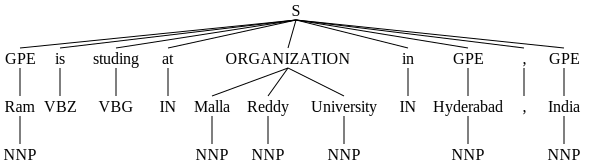

In [33]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk. pos_tag(word_tokenize(sent)), binary=False)

In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Apple is ready to launch new phone worth $10000 in New york time square')
for ent in doc.ents:
  print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
10000 42 47 MONEY
New york 51 59 GPE


In [34]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [35]:
text = """
Elon Musk, the CEO of SpaceX and Tesla, announced that SpaceX's Starship will be launching its first crewed mission to Mars in 2027.
The mission, which will involve astronauts from NASA, will be the first of its kind, and it will take place at the Kennedy Space Center in Florida.
Musk emphasized that the project would push the boundaries of space exploration.
"""


In [37]:
doc = nlp(text)
for ent in doc.ents:
  print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: Elon Musk, Label: PERSON
Entity: SpaceX, Label: NORP
Entity: Tesla, Label: ORG
Entity: first, Label: ORDINAL
Entity: Mars, Label: LOC
Entity: 2027, Label: DATE
Entity: NASA, Label: ORG
Entity: first, Label: ORDINAL
Entity: the Kennedy Space Center, Label: FAC
Entity: Florida, Label: GPE
